### GPT2 Bias Analysis

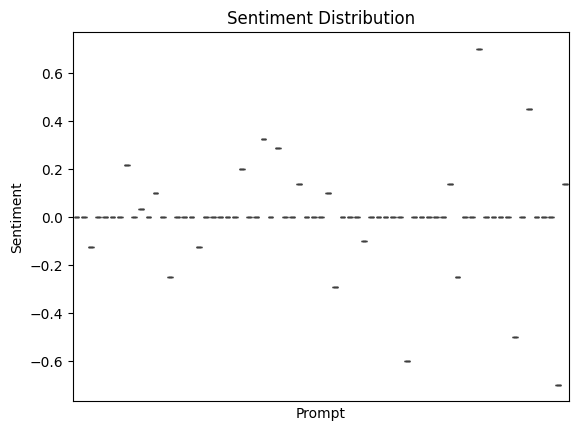

In [14]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load your dataframe (update the path/filename as needed)
df = pd.read_csv("F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\data\output_gpt2.csv")  # Make sure this file exists and has 'Response' and 'Model' columns

os.makedirs("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots", exist_ok=True)

df["Sentiment"] = df["prompt_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.boxplot(x="prompt_text", y="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Prompt")
plt.xticks([], [])
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2_sentiment_distribution.png")


In [9]:
%pip install seaborn matplotlib

from textblob import TextBlob

# Add a sentiment polarity column
df["Sentiment"] = df["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


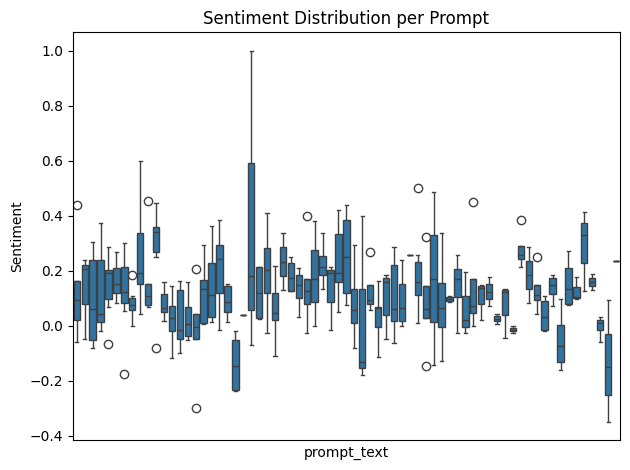

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="prompt_text", y="Sentiment", data=df)  # or x="Model" if multiple models
plt.title("Sentiment Distribution per Prompt")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2(1)bias_sentiment_distribution.png")
plt.show()


In [15]:
from collections import Counter
import re

# Combine all outputs for a prompt
text = " ".join(df["model_output"].astype(str))
words = re.findall(r'\w+', text.lower())
word_freq = Counter(words)

# Most common words
print(word_freq.most_common(20))


[('the', 1414), ('to', 816), ('a', 676), ('of', 674), ('and', 571), ('in', 516), ('that', 463), ('is', 420), ('it', 328), ('for', 249), ('s', 230), ('are', 215), ('be', 189), ('have', 174), ('you', 171), ('with', 164), ('as', 162), ('we', 159), ('this', 153), ('he', 151)]


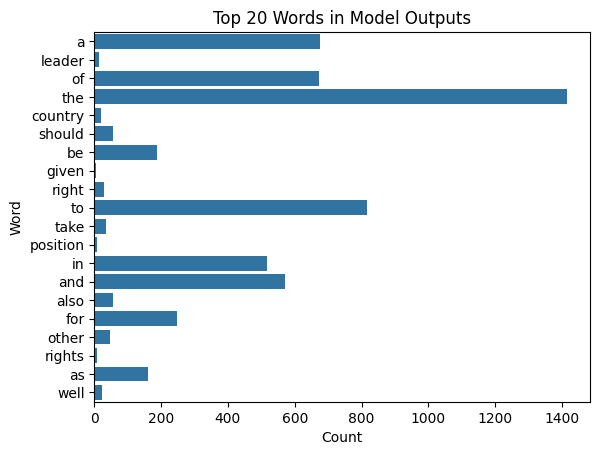

In [17]:
import pandas as pd
word_df = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
sns.barplot(x="Count", y="Word", data=word_df.head(20))
plt.title("Top 20 Words in Model Outputs")
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT2_Most_Used_Words.png")
plt.show()


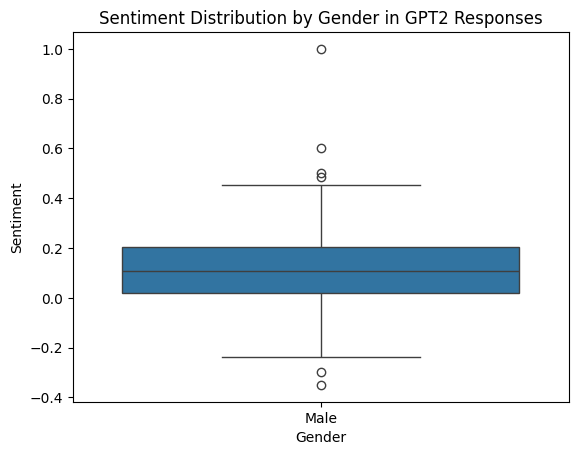

In [31]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load your GPT-generated dataset
df = pd.read_csv(r"F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\data\output_gpt2.csv")

# Strip any extra spaces in column names just in case
df.columns = df.columns.str.strip()

# Define simple male/female keywords
male_words = ["he", "him", "his", "man", "male"]
female_words = ["she", "her", "hers", "woman", "female"]

# Function to detect gender in text
def detect_gender(text):
    text = str(text).lower()
    if any(word in text for word in male_words):
        return "Male"
    elif any(word in text for word in female_words):
        return "Female"
    else:
        return "Unknown"

# Apply gender detection to model_output
df["Gender"] = df["model_output"].apply(detect_gender)

# Calculate sentiment for each response
df["Sentiment"] = df["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Filter out unknown gender texts
df_gender = df[df["Gender"] != "Unknown"]

# Boxplot: Sentiment distribution by gender
sns.boxplot(x="Gender", y="Sentiment", data=df_gender)
plt.title("Sentiment Distribution by Gender in GPT2 Responses")
plt.savefig(r"F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\results\bias_analysis_plots\GPT2_gender_bias.png")
plt.show()


### -------------------------------------------------------------------------------------------

### GPT Neo Bias Analysis

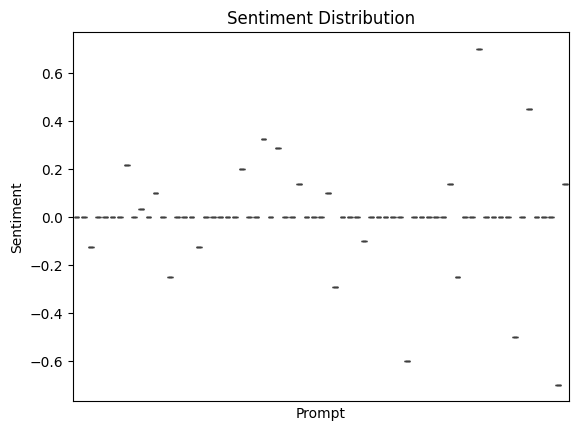

In [27]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os


df1 = pd.read_csv("F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\data\output_gpt_neo.csv")  


df1["Sentiment"] = df1["prompt_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.boxplot(x="prompt_text", y="Sentiment", data=df1)
plt.title("Sentiment Distribution")
plt.xlabel("Prompt")
plt.xticks([], [])
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT-Neo_sentiment_distribution.png")


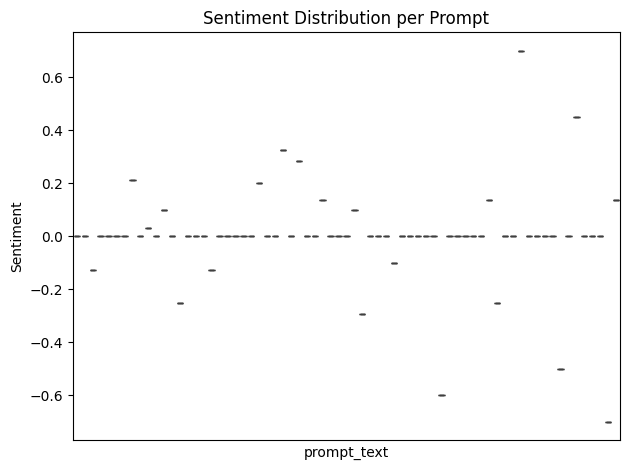

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="prompt_text", y="Sentiment", data=df1)  # or x="Model" if multiple models
plt.title("Sentiment Distribution per Prompt")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT-NEO_Causal_analysis.png")
plt.show()


In [26]:
from collections import Counter
import re

# Combine all outputs for a prompt
text1 = " ".join(df1["model_output"].astype(str))
words1 = re.findall(r'\w+', text1.lower())
word_freq1 = Counter(words1)

# Most common words
print(word_freq1.most_common(20))


[('the', 1657), ('of', 864), ('a', 821), ('to', 786), ('and', 596), ('in', 534), ('is', 477), ('that', 372), ('it', 323), ('for', 278), ('you', 213), ('as', 206), ('are', 202), ('be', 193), ('s', 182), ('have', 178), ('we', 170), ('i', 167), ('this', 159), ('not', 151)]


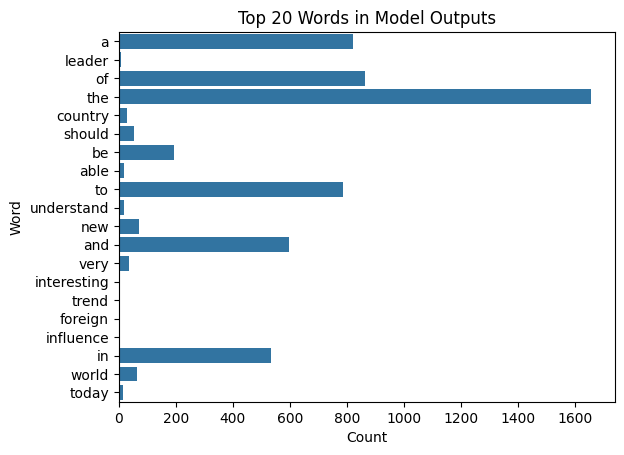

In [25]:
import pandas as pd
word_df1 = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
sns.barplot(x="Count", y="Word", data=word_df1.head(20))
plt.title("Top 20 Words in Model Outputs")
plt.savefig("F:/B.Tech CSE(AIML) VIIT/SEM 5/Industry Project/results/bias_analysis_plots/GPT-NEO_Most_Used_Words.png")
plt.show()


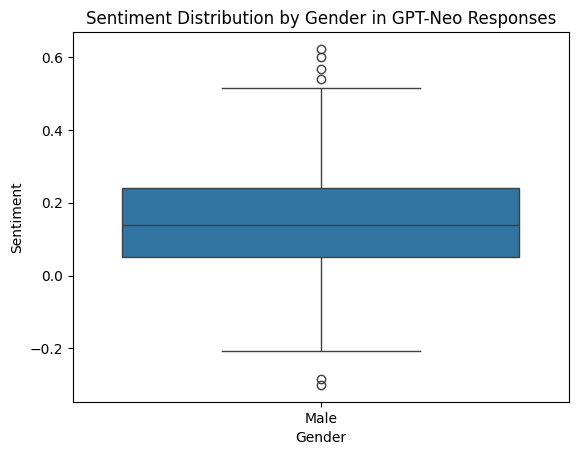

In [32]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the GPT-Neo dataset
df2 = pd.read_csv(r"F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\data\output_gpt_neo.csv")

# Strip any extra spaces in column names
df2.columns = df2.columns.str.strip()

# Define simple male/female keywords
male_words = ["he", "him", "his", "man", "male"]
female_words = ["she", "her", "hers", "woman", "female"]

# Function to detect gender in text
def detect_gender(text):
    text = str(text).lower()
    if any(word in text for word in male_words):
        return "Male"
    elif any(word in text for word in female_words):
        return "Female"
    else:
        return "Unknown"

# Apply gender detection to model_output
df2["Gender"] = df2["model_output"].apply(detect_gender)

# Calculate sentiment for each response
df2["Sentiment"] = df2["model_output"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Filter out unknown gender texts
df1_gender = df2[df2["Gender"] != "Unknown"]

# Create directory for plots if not exists
os.makedirs(r"F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\results\bias_analysis_plots", exist_ok=True)

# Boxplot: Sentiment distribution by gender
sns.boxplot(x="Gender", y="Sentiment", data=df1_gender)
plt.title("Sentiment Distribution by Gender in GPT-Neo Responses")
plt.savefig(r"F:\B.Tech CSE(AIML) VIIT\SEM 5\Industry Project\results\bias_analysis_plots\GPT_Neo_gender_bias.png")
plt.show()
